# **Initial Exploration**

The purpose of this notebook is to do initial exploration into the NFL's Big Data Bowl project

## **1.0: Data and Library import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [26]:
tackles = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tackles.csv')
games = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/games.csv')
players = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/players.csv')
plays = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/plays.csv')

In [27]:
pd.set_option('display.max_columns', None)
plays.head()


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [4]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [5]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [6]:
players.position.value_counts()

position
WR     218
CB     191
OLB    140
DT     127
RB     125
TE     125
DE     125
T      121
G      103
ILB     93
FS      78
SS      64
QB      61
C       55
NT      31
FB      13
MLB     11
LS       1
DB       1
Name: count, dtype: int64

**Loading in tracking data**

In [15]:
tw1 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_1.csv')
tw2 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_2.csv')
tw3 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_3.csv')
tw4 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_4.csv')
tw5 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_5.csv')
tw6 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_6.csv')
tw7 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_7.csv')
tw8 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_8.csv')
tw9 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_9.csv')



In [19]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407439 entries, 0 to 1407438
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1407439 non-null  int64  
 1   playId         1407439 non-null  int64  
 2   nflId          1346246 non-null  float64
 3   displayName    1407439 non-null  object 
 4   frameId        1407439 non-null  int64  
 5   time           1407439 non-null  object 
 6   jerseyNumber   1346246 non-null  float64
 7   club           1407439 non-null  object 
 8   playDirection  1407439 non-null  object 
 9   x              1407439 non-null  float64
 10  y              1407439 non-null  float64
 11  s              1407439 non-null  float64
 12  a              1407439 non-null  float64
 13  dis            1407439 non-null  float64
 14  o              1346397 non-null  float64
 15  dir            1346397 non-null  float64
 16  event          130268 non-null   object 
dtypes: float

In [20]:
tw1['game_play_id'] = tw1['gameId'].astype('str') + '_' + tw1['playId'].astype('str')

In [21]:
tw1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_id
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,2022090800_56
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,2022090800_56
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,2022090800_56
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,2022090800_56
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,2022090800_56


In [28]:
#Function to create 'game_play_Id' column in DF
def game_play_Id(df):
    df['game_play_Id'] = df['gameId'].astype('str') + '_' + df['playId'].astype('str')

    return df

In [29]:
game_play_Id(tw1)
game_play_Id(tw2)
game_play_Id(tw3)
game_play_Id(tw4)
game_play_Id(tw5)
game_play_Id(tw6)
game_play_Id(tw7)
game_play_Id(tw8)
game_play_Id(tw9)

NameError: name 'tw1' is not defined

In [41]:
tw1[130:155]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_id,game_play_Id
130,2022090800,56,42816.0,Troy Hill,21,2022-09-08 20:24:07.200000,2.0,LA,left,69.33,11.15,2.57,1.33,0.26,10.69,357.83,NaN,2022090800_56,2022090800_56
131,2022090800,56,42816.0,Troy Hill,22,2022-09-08 20:24:07.299999,2.0,LA,left,69.32,11.40,2.43,1.44,0.25,12.93,358.61,NaN,2022090800_56,2022090800_56
132,2022090800,56,43294.0,Jalen Ramsey,1,2022-09-08 20:24:05.200000,5.0,LA,left,77.95,40.78,5.50,3.00,0.54,139.54,172.50,NaN,2022090800_56,2022090800_56
133,2022090800,56,43294.0,Jalen Ramsey,2,2022-09-08 20:24:05.299999,5.0,LA,left,78.02,40.21,5.76,2.29,0.56,140.14,173.60,pass_arrived,2022090800_56,2022090800_56
134,2022090800,56,43294.0,Jalen Ramsey,3,2022-09-08 20:24:05.400000,5.0,LA,left,78.06,39.63,5.97,1.78,0.59,143.65,175.43,NaN,2022090800_56,2022090800_56
135,2022090800,56,43294.0,Jalen Ramsey,4,2022-09-08 20:24:05.500000,5.0,LA,left,78.10,39.03,6.02,1.18,0.60,143.65,176.65,NaN,2022090800_56,2022090800_56
136,2022090800,56,43294.0,Jalen Ramsey,5,2022-09-08 20:24:05.599999,5.0,LA,left,78.13,38.44,5.99,0.97,0.60,141.83,177.73,NaN,2022090800_56,2022090800_56
137,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.15,37.85,5.88,1.23,0.59,140.96,178.50,pass_outcome_caught,2022090800_56,2022090800_56
138,2022090800,56,43294.0,Jalen Ramsey,7,2022-09-08 20:24:05.799999,5.0,LA,left,78.17,37.28,5.62,1.87,0.57,142.18,178.89,NaN,2022090800_56,2022090800_56
139,2022090800,56,43294.0,Jalen Ramsey,8,2022-09-08 20:24:05.900000,5.0,LA,left,78.18,36.74,5.32,2.62,0.54,142.18,179.18,NaN,2022090800_56,2022090800_56


In [30]:
game_play_Id(tackles)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id
0,2022090800,101,42816,1,0,0,0,2022090800_101
1,2022090800,393,46232,1,0,0,0,2022090800_393
2,2022090800,486,40166,1,0,0,0,2022090800_486
3,2022090800,646,47939,1,0,0,0,2022090800_646
4,2022090800,818,40107,1,0,0,0,2022090800_818
...,...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1,2022091113_2494
17422,2022092502,3510,42406,0,0,0,1,2022092502_3510
17423,2022091113,3642,43478,0,0,0,1,2022091113_3642
17424,2022091901,3578,42431,0,0,0,1,2022091901_3578


In [47]:
tackles.loc[tackles['game_play_Id'] == '2022090800_818']

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id
4,2022090800,818,40107,1,0,0,0,2022090800_818
11460,2022090800,818,54650,0,1,0,0,2022090800_818


In [48]:
players.loc[players['nflId'] == 40107]

,nflId,height,weight,birthDate,collegeName,position,displayName
107,40107,6-0,197,1990-12-31,Iowa,FS,Micah Hyde


In [49]:
players.loc[players['nflId'] == 54650]

,nflId,height,weight,birthDate,collegeName,position,displayName
1598,54650,6-1,205,NaN,Villanova,CB,Christian Benford


In [31]:
game_play_Id(plays)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_play_Id
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,2022100908_3537
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,2022091103_3126
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,2022091111_1148
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,2022100212_2007
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,2022091900_1372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,WAS,39,13:31,0,0,NaN,NaN,NaN,1,1,N,49,SINGLEBACK,6.0,0.577800,0.638600,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN,2022100204_123
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,SEA,30,6:08,17,16,C,0.0,NaN,2,2,N,40,SINGLEBACK,7.0,0.298983,0.615241,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN,2022091200_3467
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,CIN,41,9:35,26,21,NaN,NaN,NaN,6,6,N,69,SHOTGUN,6.0,0.639439,0.667054,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN,2022101605_3371
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,TEN,34,2:02,17,24,NaN,NaN,NaN,-2,-2,N,44,SHOTGUN,6.0,0.518695,0.410611,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN,2022100207_2777


In [22]:
plays.loc[plays['game_play_Id'] == '2022090800_818']

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_play_Id
6556,2022090800,818,47853,Darrell Henderson,(15:00) (Shotgun) M.Stafford pass short left t...,2,3,4,LA,BUF,LA,30,15:00,0,7,C,-4.0,NaN,1,1,N,80,EMPTY,6.0,0.956909,0.25042,0.74958,-0.017527,0.017527,0.215741,-1.372731,NaN,NaN,NaN,NaN,2022090800_818


## **2.0: Data Wrangling**

### **2.1: Grouping Tackles by Player**

In [32]:
tackles = pd.merge(tackles, plays[['game_play_Id', 'defensiveTeam']], on='game_play_Id', how='left')

In [34]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id,defensiveTeam
0,2022090800,101,42816,1,0,0,0,2022090800_101,LA
1,2022090800,393,46232,1,0,0,0,2022090800_393,BUF
2,2022090800,486,40166,1,0,0,0,2022090800_486,BUF
3,2022090800,646,47939,1,0,0,0,2022090800_646,LA
4,2022090800,818,40107,1,0,0,0,2022090800_818,BUF


In [36]:
tackles_grouped = tackles.groupby('nflId').agg({'tackle':'sum', 'assist':'sum', 'forcedFumble':'sum', 'pff_missedTackle':'sum', 'defensiveTeam':'first'})

In [37]:
tackles_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 33131 to 55241
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tackle            800 non-null    int64 
 1   assist            800 non-null    int64 
 2   forcedFumble      800 non-null    int64 
 3   pff_missedTackle  800 non-null    int64 
 4   defensiveTeam     800 non-null    object
dtypes: int64(4), object(1)
memory usage: 37.5+ KB


In [38]:
tackles_grouped.head()

,tackle,assist,forcedFumble,pff_missedTackle,defensiveTeam
nflId,,,,,
33131,8,10,0,4,BAL
35449,4,4,0,1,PIT
35452,6,6,0,1,PHI
35454,3,3,0,1,BAL
35459,28,23,0,9,DEN


In [39]:
tackles_grouped['total_tackles'] = tackles_grouped['tackle'] + 0.5 * tackles_grouped['assist']

In [40]:
tackles_grouped.head()

,tackle,assist,forcedFumble,pff_missedTackle,defensiveTeam,total_tackles
nflId,,,,,,
33131,8,10,0,4,BAL,13.0
35449,4,4,0,1,PIT,6.0
35452,6,6,0,1,PHI,9.0
35454,3,3,0,1,BAL,4.5
35459,28,23,0,9,DEN,39.5


In [41]:
tackles_grouped['missed_tackle_rate'] = tackles_grouped['pff_missedTackle'] / (tackles_grouped['total_tackles'] + tackles_grouped['pff_missedTackle'])

#### **2.1.1: Distribution of Missed_Tackle_Rate**

/var/folders/38/1m7d78r13mngspmlwjmj74480000gn/T/ipykernel_71896/841000921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tackles_grouped['missed_tackle_rate'])
/Users/alexiainman/opt/anaconda3/envs/big-data-bowl-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexiainman/opt/anaconda3/envs/big-data-bowl-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

<Axes: xlabel='missed_tackle_rate', ylabel='Density'>

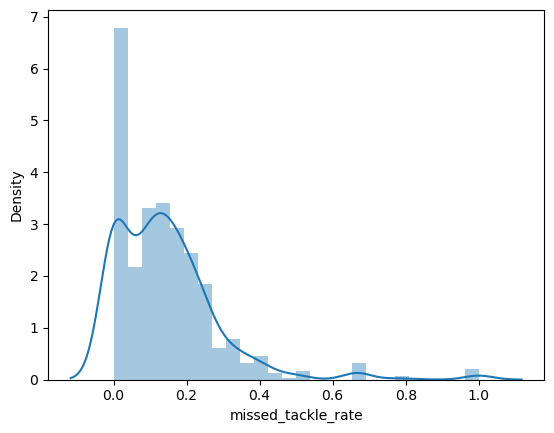

In [65]:
sns.distplot(tackles_grouped['missed_tackle_rate'])

**Enacting tackle opportunities minimum of 10**

In [69]:
tackles_grouped['total_tackling_opportunities'] = tackles_grouped['total_tackles'] + tackles_grouped['pff_missedTackle']

In [71]:
tackles_grouped.drop(columns = 'total_tackling_opportunites', inplace=True)

In [72]:
tackles_grouped.head()

,tackle,assist,forcedFumble,pff_missedTackle,defensiveTeam,total_tackles,missed_tackle_rate,total_tackling_opportunities
nflId,,,,,,,,
33131,8,10,0,4,BAL,13.0,0.235294,17.0
35449,4,4,0,1,PIT,6.0,0.142857,7.0
35452,6,6,0,1,PHI,9.0,0.100000,10.0
35454,3,3,0,1,BAL,4.5,0.181818,5.5
35459,28,23,0,9,DEN,39.5,0.185567,48.5


In [73]:
tackles_grouped_opp_min = tackles_grouped[tackles_grouped['total_tackling_opportunities'] >= 10]

In [74]:
tackles_grouped_opp_min.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 33131 to 55032
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tackle                        478 non-null    int64  
 1   assist                        478 non-null    int64  
 2   forcedFumble                  478 non-null    int64  
 3   pff_missedTackle              478 non-null    int64  
 4   defensiveTeam                 478 non-null    object 
 5   total_tackles                 478 non-null    float64
 6   missed_tackle_rate            478 non-null    float64
 7   total_tackling_opportunities  478 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 33.6+ KB


**Plotting distribution with tackling opporunity minimum of 10 opportunities**

/var/folders/38/1m7d78r13mngspmlwjmj74480000gn/T/ipykernel_71896/2983450306.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tackles_grouped_opp_min['missed_tackle_rate']);
/Users/alexiainman/opt/anaconda3/envs/big-data-bowl-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexiainman/opt/anaconda3/envs/big-data-bowl-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be r

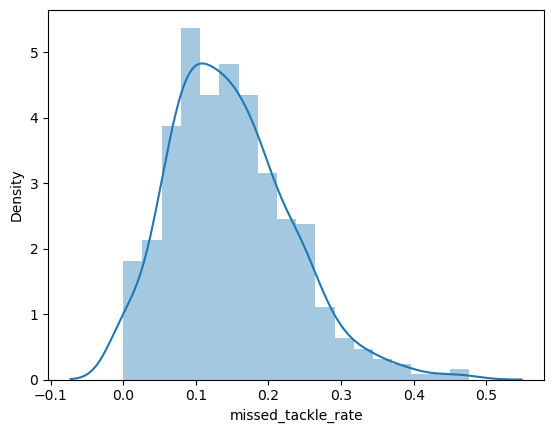

In [75]:
sns.distplot(tackles_grouped_opp_min['missed_tackle_rate']);

#### **2.1.2: EDA on Missed Tackle Rate Distribution**

In [76]:
mean = tackles_grouped_opp_min['missed_tackle_rate'].mean()
median = tackles_grouped_opp_min['missed_tackle_rate'].median()
#density = tackles_grouped_opp_min['missed_tackle_rate'].plot(kind='density')
percentile_75 = tackles_grouped_opp_min['missed_tackle_rate'].quantile(0.75)
percentile_95 = tackles_grouped_opp_min['missed_tackle_rate'].quantile(0.95)

print(f"Mean: {mean}")
print(f"Median: {median}")
#print(f"Density Plot: {density}")
print(f"75th Percentile: {percentile_75}")
print(f"95th Percentile: {percentile_95}")

Mean: 0.14731809619454878
Median: 0.13793103448275862
75th Percentile: 0.19495257452574527
95th Percentile: 0.2944444444444444


In [43]:
team_tackles = tackles_grouped.groupby('defensiveTeam').agg({'tackle':'sum', 'assist':'sum', 'forcedFumble':'sum', 'pff_missedTackle':'sum', 'total_tackles':'sum', 'missed_tackle_rate':'mean'})

In [44]:
team_tackles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, ARI to WAS
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tackle              32 non-null     int64  
 1   assist              32 non-null     int64  
 2   forcedFumble        32 non-null     int64  
 3   pff_missedTackle    32 non-null     int64  
 4   total_tackles       32 non-null     float64
 5   missed_tackle_rate  32 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.8+ KB


In [46]:
team_tackles.head(32)

,tackle,assist,forcedFumble,pff_missedTackle,total_tackles,missed_tackle_rate
defensiveTeam,,,,,,
ARI,347,189,6,72,441.5,0.155454
ATL,343,235,5,81,460.5,0.132988
BAL,309,151,6,66,384.5,0.142409
BUF,298,148,0,73,372.0,0.176514
CAR,358,217,4,79,466.5,0.133555
CHI,329,176,5,75,417.0,0.144521
CIN,314,183,3,52,405.5,0.085287
CLE,274,131,3,65,339.5,0.152082
DAL,309,154,3,57,386.0,0.106921


In [47]:
WP_2022_1_9 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/NFL 2022 Week 1-9 Records.csv')

In [48]:
WP_2022_1_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                32 non-null     object 
 1   Abbreviation        32 non-null     object 
 2   Winning Percentage  32 non-null     float64
 3   Wins                32 non-null     float64
 4   Losses              32 non-null     float64
 5   Ties                32 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.6+ KB


In [51]:
WP_2022_1_9.head()

,Team,Abbreviation,Winning Percentage,Wins,Losses,Ties,defensiveTeam
0,Arizona Cardinals,ARI,0.333333,3.0,6.0,0,ARI
1,Atlanta Falcons,ATL,0.444444,4.0,5.0,0,ATL
2,Baltimore Ravens,BAL,0.666667,6.0,3.0,0,BAL
3,Buffalo Bills,BUF,0.750000,6.0,2.0,0,BUF
4,Carolina Panthers,CAR,0.222222,2.0,7.0,0,CAR


In [50]:
WP_2022_1_9['defensiveTeam'] = WP_2022_1_9['Abbreviation']

In [52]:
team_tackles = pd.merge(team_tackles, WP_2022_1_9[['defensiveTeam', 'Winning Percentage']], on='defensiveTeam', how='left')

In [53]:
team_tackles.head(32)

,defensiveTeam,tackle,assist,forcedFumble,pff_missedTackle,total_tackles,missed_tackle_rate,Winning Percentage
0,ARI,347,189,6,72,441.5,0.155454,0.333333
1,ATL,343,235,5,81,460.5,0.132988,0.444444
2,BAL,309,151,6,66,384.5,0.142409,0.666667
3,BUF,298,148,0,73,372.0,0.176514,0.750000
4,CAR,358,217,4,79,466.5,0.133555,0.222222
5,CHI,329,176,5,75,417.0,0.144521,0.333333
6,CIN,314,183,3,52,405.5,0.085287,0.555556
7,CLE,274,131,3,65,339.5,0.152082,0.375000
8,DAL,309,154,3,57,386.0,0.106921,0.750000
9,DEN,302,182,4,77,393.0,0.154081,0.375000


In [64]:
team_tackles.pff_missedTackle.sum()

2090

/Users/alexiainman/opt/anaconda3/envs/big-data-bowl-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexiainman/opt/anaconda3/envs/big-data-bowl-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


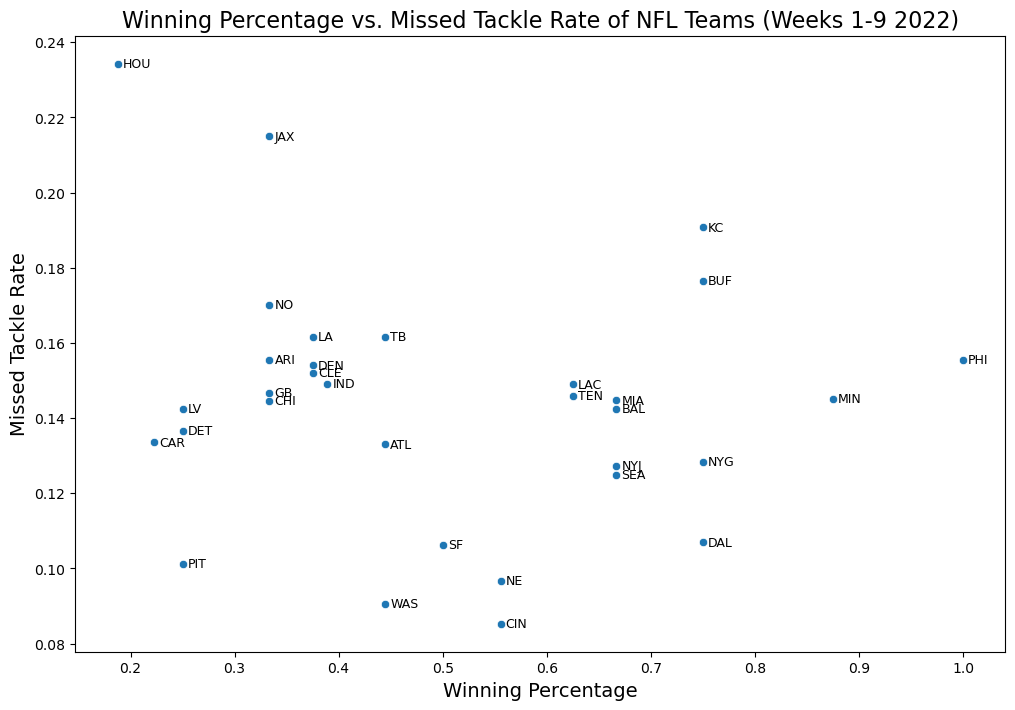

In [63]:
###Scatter plot of missed tackle rate and winning percentage by team
# Adjusting the scatter plot to use circle markers and offsetting the labels

# Creating the scatter plot with circle markers
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='Winning Percentage', y='missed_tackle_rate', data=team_tackles, marker='o')

# Adding title and axis labels
scatter_plot.set_title('Winning Percentage vs. Missed Tackle Rate of NFL Teams (Weeks 1-9 2022)', fontsize=16)
scatter_plot.set_xlabel('Winning Percentage', fontsize=14)
scatter_plot.set_ylabel('Missed Tackle Rate', fontsize=14)

# Offset for labels
label_offset = 0.005

# Labeling each point with its index, with an offset to avoid overlapping
for i, txt in enumerate(team_tackles['defensiveTeam']):
    plt.text(team_tackles['Winning Percentage'][i] + label_offset, 
             team_tackles['missed_tackle_rate'][i] - 0.001, 
             txt, fontsize=9)

# Displaying the plot
plt.show()
